In [1]:
# import packages
from __future__ import print_function
import gspread
from oauth2client.service_account import ServiceAccountCredentials

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from os.path import join, dirname
from datetime import datetime
import csv

from statsmodels import *
import statsmodels.api as sm
from scipy.stats import *

from sklearn import linear_model
import matplotlib as mpl



# 1 Import survey responses

In [2]:
#Import Survey Responses from Google Sheet
#Procedure to retrieve latest survey responses.
#Establishes connection to google API using json key stored in local folder
#Downloads latest responses in the google sheets
#Returns pandas dataframe with all reponses. 

#Specify sheet name
spreadsheet = '2020-08-14 Matt Matthew Walford BIG5 Psycometric Survey Free personality report from your online public profiles responses to forms survey https://docs.google.com/forms/d/e/1FAIpQLSd3hm7vkXpIaHg4KTzLriyxk71ec2qbSdgkV7beLOmSQIOszA/viewform shared with Vei Yie and alice alice.d.matthews@gmail.com'
    
#Specify Json key location
json_file = 'survey-personality-71154dfbe30a.json'
    
#load in json file key
json_key = json.load(open(json_file))

creds = ServiceAccountCredentials.from_json_keyfile_name(json_file)
        
# Find a workbook by name and open the first sheet
client = gspread.authorize(creds)

#Open Survey Data of the spreadsheet and intalise as a variable
survey_sheet = client.open(spreadsheet).sheet1

#Convert sheet to a pandas dataframe
survey_data = pd.DataFrame(survey_sheet.get_all_records())

# set the index to match the Google Sheet index.  Important because the index functions as a unique ID for each respondent
index = pd.Index(range(2, len(survey_data)+2))
survey_data.set_index(index, inplace=True)



In [3]:
survey_data

,Timestamp,Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Am the life of the party.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Feel little concern for others.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Am always prepared.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Get stressed out easily.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Have a rich vocabulary.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Don't talk a lot.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Am interested in people.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Leave my belongings around.],Please continue to select the most appropriate response to indicate the extent to which the statement is accurate of you. [Am relaxed most of the time.],...,What age bracket do you fall in?,What is your country of residence?,Email,First Name,Report Attempted? ('Yes' means a report was attempted - it is not always successful though. Check next column for notes),Orange rows = AH to send to user,Number of characters in report,Low character count warning Y/N,Link to report in folder https://drive.google.com/drive/folders/1FrRUiS9ClUgzJaoe8i7_9vRr77fMuY1m?usp=sharing\nAndrew to make copy of file to change owner of each report to reputationaire@gmail.com when move to Sent folder,Date sent to user date using template in https://docs.google.com/document/d/1DBDhd2lGN8agseJqgOiObAzkGMhppgowZvlCBmWzOC4/edit
2,15/06/2020 16:56:53,Moderately Inaccurate,Moderately Inaccurate,Very Accurate,Moderately Inaccurate,Moderately Inaccurate,Moderately Accurate,Moderately Inaccurate,Moderately Inaccurate,Very Inaccurate,...,40-44,Australia,matthewwalford@yahoo.co.uk,Matthew,yes,,,,https://drive.google.com/file/d/1U4K6qv5jJ4n7A...,Y
3,18/06/2020 20:44:16,Moderately Accurate,Moderately Inaccurate,Moderately Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Moderately Inaccurate,Very Inaccurate,Moderately Inaccurate,...,35-39,Australia,andrew@reputationaire.com,Andrew,yes,not able to generate - twitter is private,,,,
4,19/06/2020 06:07:23,Neither Accurate Nor Inaccurate,Very Inaccurate,Moderately Accurate,Moderately Inaccurate,Very Accurate,Moderately Accurate,Very Accurate,Moderately Accurate,Very Accurate,...,18-24,United States,andrew.m.newman37@gmail.com,Andrew,yes,not able to generate - only linkedin provided,,,,
5,22/06/2020 15:01:54,Moderately Inaccurate,Very Inaccurate,Moderately Accurate,Very Inaccurate,Moderately Accurate,Very Accurate,Moderately Accurate,Very Inaccurate,Moderately Accurate,...,30-34,Nigeria,oluwajobabello@gmail.com,Oluwajoba,yes,,3694,N,https://drive.google.com/file/d/1jTyRA2VPlllGv...,Y
6,22/06/2020 23:11:12,Very Inaccurate,Very Inaccurate,Moderately Accurate,Very Accurate,Very Accurate,Moderately Inaccurate,Moderately Accurate,Very Inaccurate,Very Inaccurate,...,25-29,Nigeria,adebola.rb.js@gmail.com,Adebola,yes,,3058,N,https://drive.google.com/file/d/1mwlCMv4QAmhVt...,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,30/12/2021 00:32:28,Moderately Accurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Very Accurate,Moderately Inaccurate,Moderately Accurate,...,40-44,Sri Lanka,2asela@gmail.com,Asela,yes,,,,,
365,30/12/2021 05:55:03,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Moderately Accurate,Neither 

# 2 Demographic Distributions

C:\Users\alice\anaconda3\envs\Reputationaire\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.0, 1.0, 'Age distribution among survey respondents')

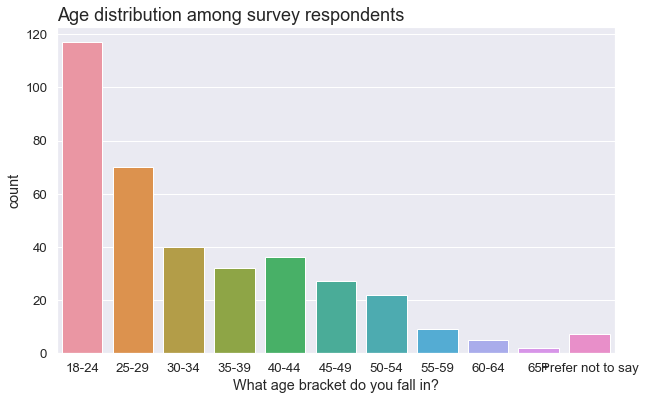

In [4]:
# Distribution of ages among survey respondents

age_data = survey_data["What age bracket do you fall in?"]

sns.set(rc = {'figure.figsize':(10, 6)}, font_scale = 1.2)
ax = sns.countplot(age_data, order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+', 'Prefer not to say'])
ax.set_title(label = f"Age distribution among survey respondents", fontsize = 18, loc = 'left')
   

C:\Users\alice\anaconda3\envs\Reputationaire\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.0, 1.0, 'Country distribution among survey respondents')

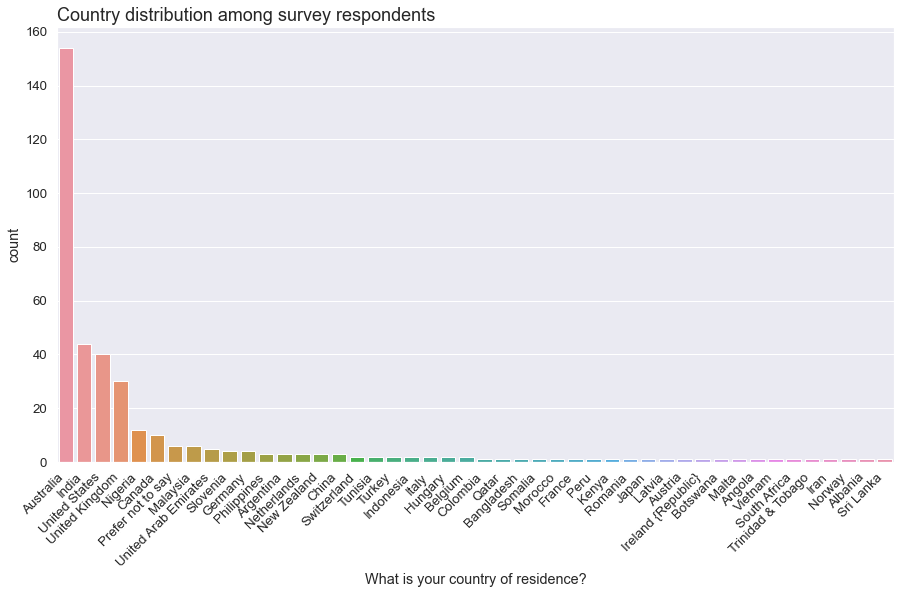

In [5]:
# Distribution of countries among respondents

country_data = survey_data["What is your country of residence?"]
sns.set(rc = {'figure.figsize':(15,8)}, font_scale = 1.2)
ax = sns.countplot(country_data,
                    order = country_data.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title(label = 'Country distribution among survey respondents', fontsize = 18, loc = 'left')
   

C:\Users\alice\anaconda3\envs\Reputationaire\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.0, 1.0, 'Gender distribution among survey respondents')

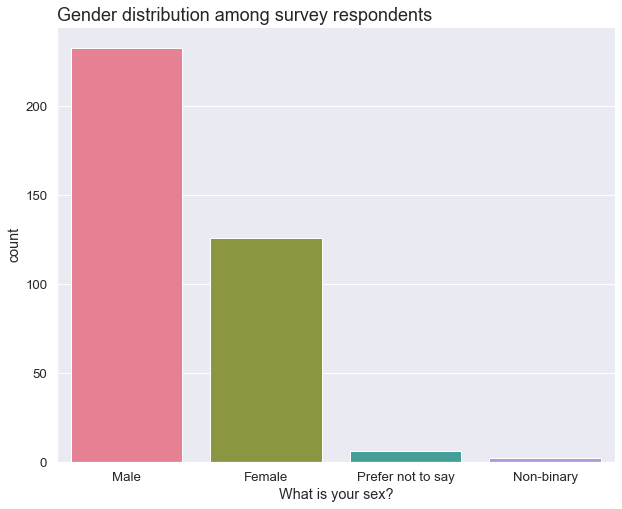

In [6]:
# Gender distribution of survey respondents
gender_data = survey_data['What is your sex?']

sns.set(rc = {'figure.figsize':(10,8)}, font_scale = 1.2)
ax = sns.countplot(gender_data, palette = "husl")
ax.set_title(label = 'Gender distribution among survey respondents', fontsize = 18, loc = 'left')



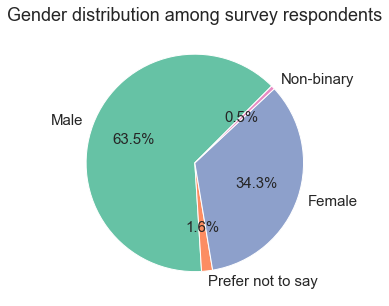

In [7]:
# reindex gender data to make the pie plot display nicely
gender_data = gender_data.value_counts().reindex(['Male', 'Prefer not to say', 'Female', 'Non-binary'])

colours = sns.color_palette("Set2")

fig = plt.pie(gender_data,
        labels=['Male', 'Prefer not to say', 'Female', 'Non-binary'],
        startangle=45,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        colors = colours)

plt.title('Gender distribution among survey respondents', fontsize=18, loc = 'center')
fig = plt.gcf()
fig.set_size_inches(5, 5)

# 3 Calculate IPIP 50-item Big 5 scores

In [8]:
# read in the CSV file of the Big 5 Survey questions, description and scoring code
survey_code = pd.read_csv('Big 5 Survey Code.csv')
survey_code
question_codes = []
x = 1
for i in list(survey_code.Code):
    q = f"Q{x} {i}"
    question_codes.append(q)
    x = x + 1
    
# add useful column names and delete unneccessary columns
col_names = question_codes
for x in ['LinkedIn', 'Reddit', 'Twitter', 'Stacko', 'Gender', 'Age', 'Country']:
    col_names.append(x)
columns_to_drop = [0, 58, 59, 60, 61, 62, 63, 64, 65] # drop the timestamp and unnecessary details
survey_data.drop(survey_data.columns[columns_to_drop], axis = 1, inplace = True)
survey_data.columns = col_names

In [9]:
# convert to the appropriate numeric scorings
# questions with 'NEG' in the tag are negatively scored, and the final score is reversed from 6 so that 5 becomes 1, 4 becomes 2 etc
survey_numerated = survey_data.replace({"Very Accurate": 5, "Moderately Accurate": 4, "Neither Accurate Nor Inaccurate": 3, "Moderately Inaccurate": 2, "Very Inaccurate": 1})

for col in survey_numerated.columns:
    if 'NEG' in col:
        survey_numerated[col] = 6-survey_numerated[col]

survey_numerated

,Q1 EXT_POS,Q2 AGR_NEG,Q3 CON_POS,Q4 EMO_NEG,Q5 OPE_POS,Q6 EXT_NEG,Q7 AGR_POS,Q8 CON_NEG,Q9 EMO_POS,Q10 OPE_NEG,...,Q48 CON_POS,Q49 EMO_NEG,Q50 OPE_POS,LinkedIn,Reddit,Twitter,Stacko,Gender,Age,Country
2,2,4,5,4,2,2,2,4,1,2,...,3,3,3,matthew-walford,intelligent-raptor,matthewwalford1,,Male,40-44,Australia
3,4,4,4,2,3,4,2,5,2,4,...,5,3,5,https://linkedin.com/in/hinesytems,,https://twitter.com/andyhine,https://stackoverflow.com/users/894199/twiz911,Male,35-39,Australia
4,3,5,4,4,5,2,5,2,5,4,...,5,2,5,https://www.linkedin.com/in/andrew-newman-40a3...,,,,Male,18-24,United States
5,2,5,4,5,4,1,4,5,4,5,...,4,5,3,https://www.linkedin.com/in/oluwajoba1/,u/Jobsy1,@Oluwajoba18,https://stackoverflow.com/users/10139385/oluwa...,Male,30-34,Nigeria
6,1,5,4,1,5,4,4,5,1,3,...,5,2,5,adebola-niran,,debosthefirst,efiwe,Male,25-29,Nigeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,4,5,2,5,4,3,5,4,4,5,...,5,4,5,2asela@gmail.com,NA,2asela@gmail.com,NA,Male,40-44,Sri Lanka
365,3,4,4,3,5,4,4,4,5,5,...,3,4,5,https://www.linkedin.com/in/jordangluck1/,NA,jgluck777,NA,Male,25-29,United States
366,3,4,3,4,3,3,3,4,3,4,...,3,3,5,https://ca.linkedin.com/in/shivam-joshi-705881133,NA,NA,NA,Male,18-24,Canada
367,1,3,4,5,4,3,4,5,2,5,...,2,5,5,https://www.linkedin.com/in/jesseuche,NA,NA,NA,Male,18-24,Nigeria


In [10]:
# calculate scores as a decimal
survey_numerated['survey_openness_raw'] = (survey_numerated.filter(regex='OPE', axis = 1).mean(axis = 1))/5 
survey_numerated['survey_conscientiousness_raw'] = (survey_numerated.filter(regex='CON', axis = 1).mean(axis = 1))/5
survey_numerated['survey_extraversion_raw'] = (survey_numerated.filter(regex='EXT', axis = 1).mean(axis = 1))/5
survey_numerated['survey_agreeableness_raw'] = (survey_numerated.filter(regex='AGR', axis = 1).mean(axis = 1))/5
survey_numerated['survey_emotional_stability_raw'] = (survey_numerated.filter(regex='EMO', axis = 1).mean(axis = 1))/5

survey_scores = survey_numerated[['survey_openness_raw', 'survey_conscientiousness_raw', 'survey_extraversion_raw','survey_agreeableness_raw', 'survey_emotional_stability_raw']].copy()
survey_scores = survey_scores[~survey_scores.index.duplicated(keep = 'first')] #remove dupilicate indices.  The ~ is a 'not' operator

# 4 Distributions of IPIP 50-item scores

Text(0, 1.01, 'Distributions of psychometric survey-based Big 5 trait scores, n = 367')

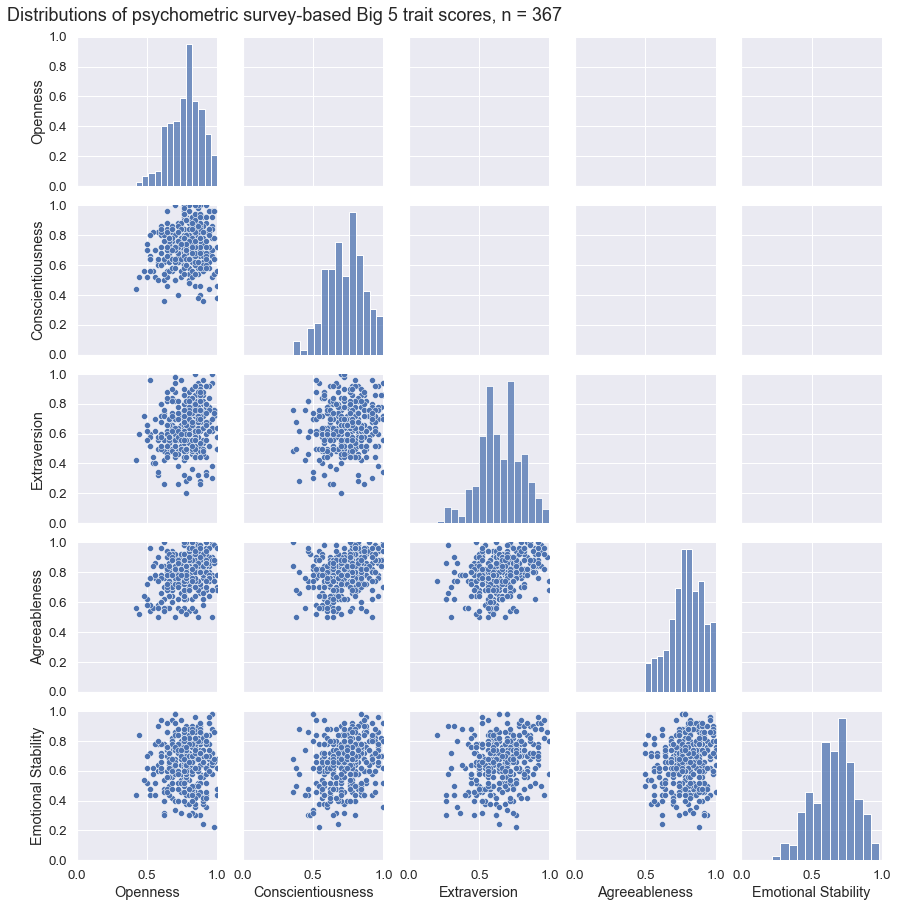

In [11]:
plot_survey_scores = survey_scores.copy() # make a copy with neater column names

plot_survey_scores.columns = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Emotional Stability"]

grid = sns.PairGrid(plot_survey_scores, diag_sharey=False)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot)
grid.set(xlim = (0,1), ylim = (0, 1))

grid.fig.suptitle("Distributions of psychometric survey-based Big 5 trait scores, n = 367", x = 0, y = 1.01, fontsize = 18, ha = 'left')

In [12]:
# calculate and add percentile scores

survey_scores['survey_openness_percentile'] = survey_scores['survey_openness_raw'].rank(pct=True)
survey_scores['survey_conscientiousness_percentile'] = survey_scores['survey_conscientiousness_raw'].rank(pct=True)
survey_scores['survey_extraversion_percentile'] = survey_scores['survey_extraversion_raw'].rank(pct=True)
survey_scores['survey_agreeableness_percentile'] = survey_scores['survey_agreeableness_raw'].rank(pct=True)
survey_scores['survey_emotional_stability_percentile'] = survey_scores['survey_emotional_stability_raw'].rank(pct=True)


survey_scores

,survey_openness_raw,survey_conscientiousness_raw,survey_extraversion_raw,survey_agreeableness_raw,survey_emotional_stability_raw,survey_openness_percentile,survey_conscientiousness_percentile,survey_extraversion_percentile,survey_agreeableness_percentile,survey_emotional_stability_percentile
2,0.52,0.66,0.60,0.54,0.72,0.027248,0.316076,0.370572,0.024523,0.633515
3,0.78,0.92,0.60,0.62,0.44,0.489101,0.915531,0.370572,0.092643,0.092643
4,0.92,0.82,0.60,0.94,0.80,0.904632,0.735695,0.370572,0.912807,0.828338
5,0.78,0.82,0.28,0.98,0.90,0.489101,0.735695,0.014986,0.968665,0.955041
6,0.84,0.78,0.46,0.86,0.46,0.693460,0.617166,0.098093,0.717984,0.119891
...,...,...,...,...,...,...,...,...,...,...
364,0.92,0.76,0.80,1.00,0.80,0.904632,0.557221,0.835150,0.990463,0.828338
365,0.98,0.64,0.74,0.74,0.68,0.985014,0.271117,0.730245,0.301090,0.520436
366,0.80,0.64,0.60,0.68,0.66,0.558583,0.271117,0.370572,0.167575,0.471390
367,0.92,0.92,0.74,0.74,0.84,0.904632,0.915531,0.730245,0.301090,0.881471


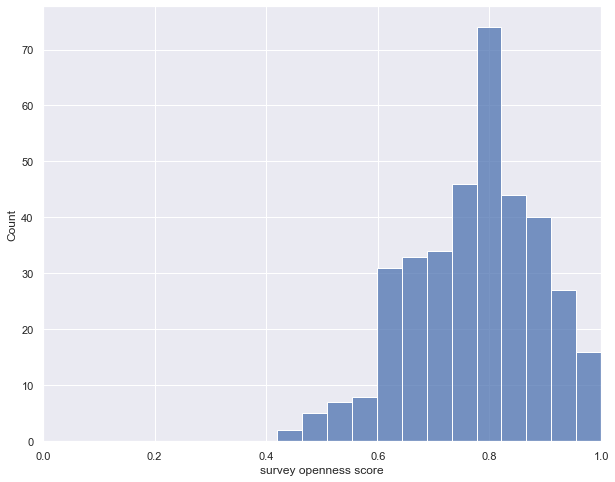

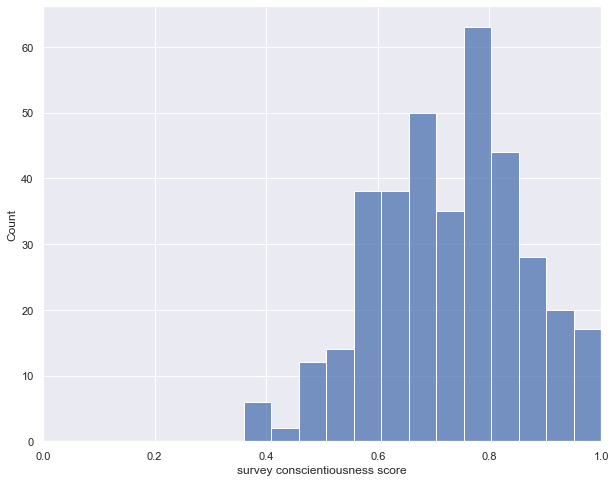

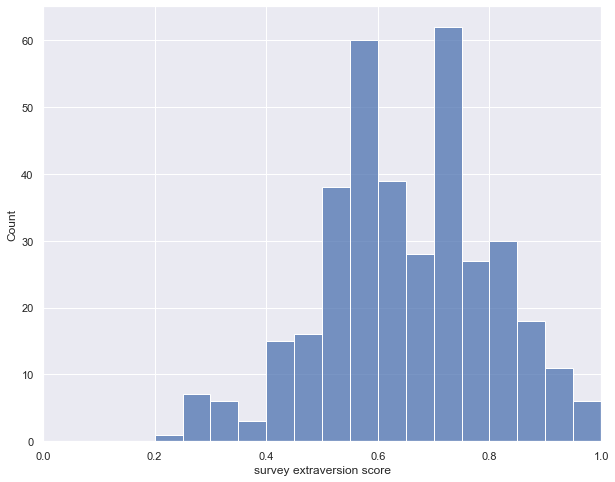

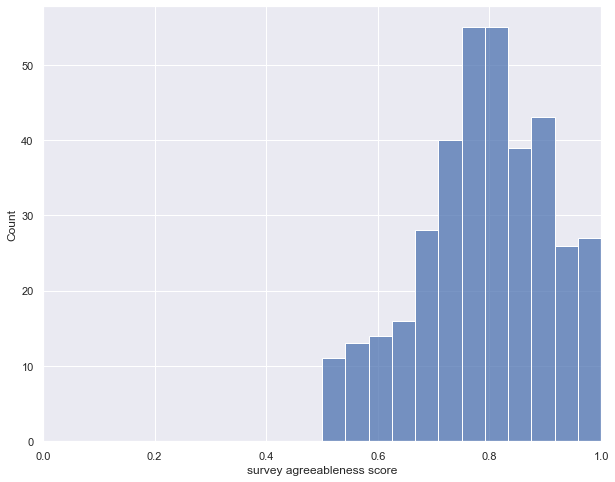

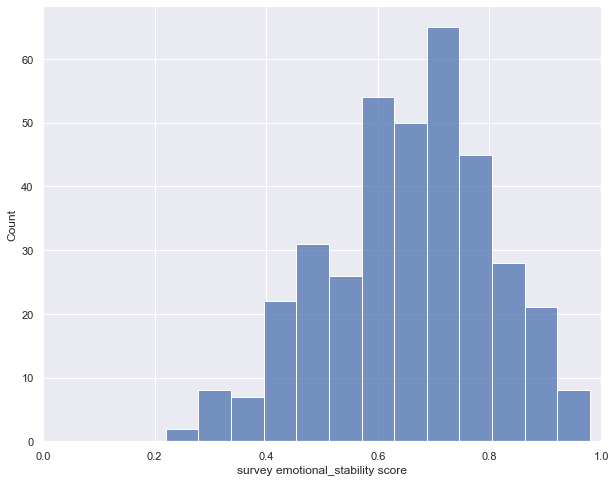

In [13]:
big_5 = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'emotional_stability']
for i in big_5:
    plt.figure()
    sns.set_theme(style = 'ticks')
    sns.set(rc = {'figure.figsize':(10,8)})
    ax = sns.histplot(survey_scores[f"survey_{i}_raw"])
    ax.set_xlabel(xlabel = f"survey {i} score")
    ax.set_xlim(0, 1)

# 5 Get Personality Insights Big 5 scores

In [14]:
# Open the Profile Data sheet and initialise as a variable
profiles = client.open(spreadsheet).get_worksheet(1)
profile_data = pd.DataFrame(profiles.get_all_records())

# set the index to be the user_id column (which is the index of the survey sheet)
profile_data.set_index(profile_data.user_id, drop = True, inplace=True)
profile_data.sort_index(axis = 0, inplace=True)

In [15]:
# Get Personality Insights NLP scores from the profile_data df
NLP_scores = profile_data.iloc[:, 11:28]
NLP_scores = NLP_scores[~NLP_scores.index.duplicated(keep = 'first')] # drop duplicate indices

NLP_scores.drop([i for i in NLP_scores.index if NLP_scores.openness_percentile[i] == ''], axis = 0, inplace=True) # drop empty rows

NLP_scores[[i for i in NLP_scores.columns if 'percentile' in i]] \
    = NLP_scores[[i for i in NLP_scores.columns if 'percentile' in i]].replace('[\%,]', '', regex=True).astype(float)/100 # drop the '%' sign, convert to float

NLP_scores[[i for i in NLP_scores.columns if 'raw' in i]]\
    = NLP_scores[[i for i in NLP_scores.columns if 'raw' in i]].astype(float) # convert raw scores to floats


# Append 'NLP_' to the NLP score column headers
for i in big_5:
    NLP_scores.rename(columns={f"{i}_percentile":f"NLP_{i}_percentile"}, inplace=True) 
    NLP_scores.rename(columns = {f"{i}_raw": f"NLP_{i}_raw"}, inplace = True)
    NLP_scores.rename(columns = {f"{i}_interpretation": f"NLP_{i}_interpretation"}, inplace = True)
    NLP_scores.rename(columns = {f"{i}_my_percentile": f"NLP_{i}_my_percentile"}, inplace = True)

# 6 Distributions of Personality Insights scores

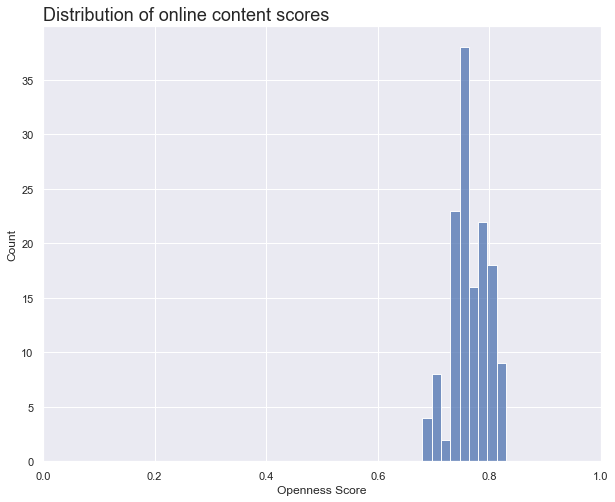

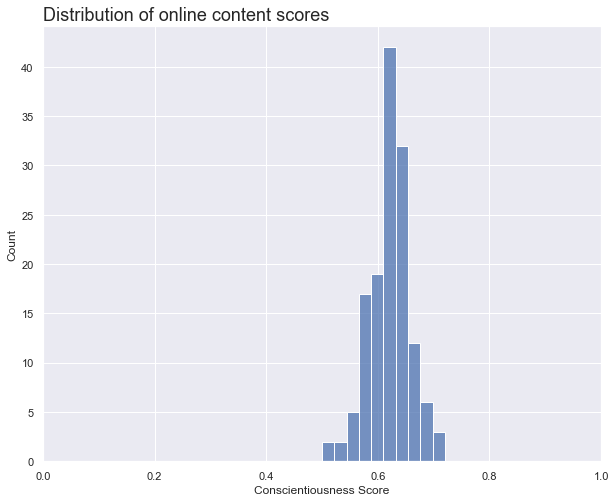

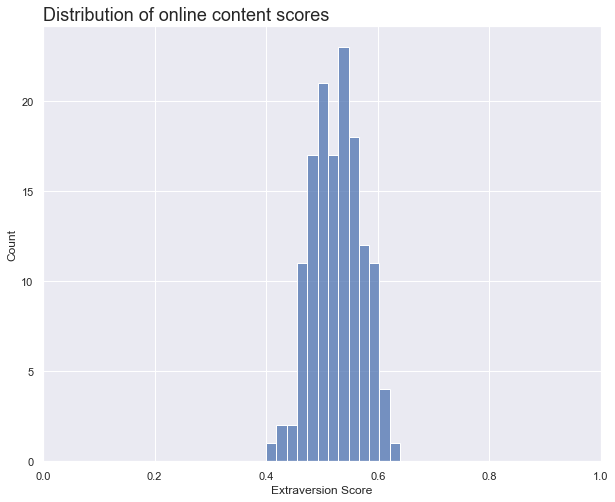

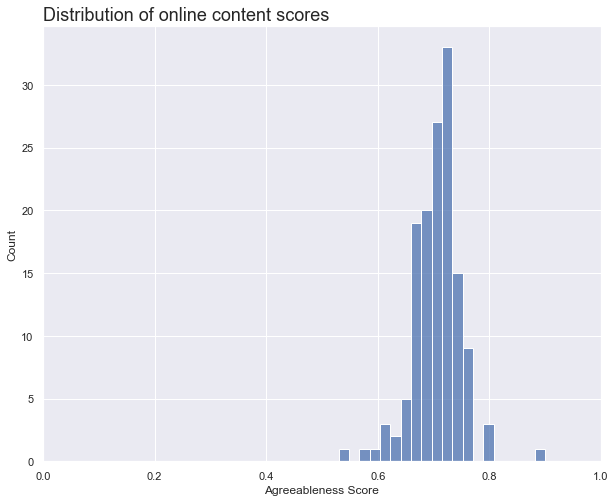

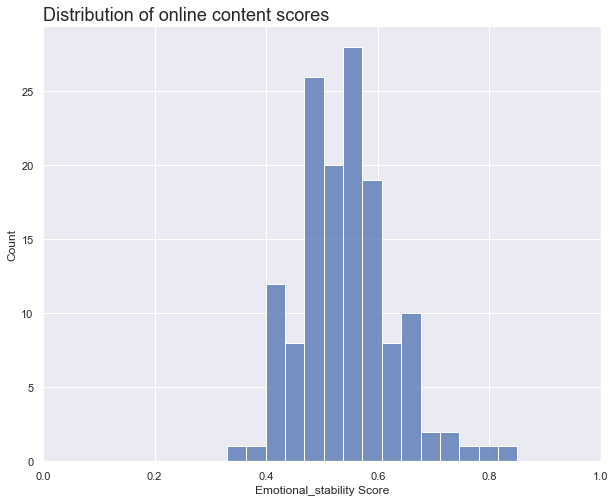

In [16]:
big_5 = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'emotional_stability']

for i in big_5:
    plt.figure()
    plt.xlim([0, 1])
    sns.set_theme(style = 'ticks')
    sns.set(rc = {'figure.figsize':(10,8)})
    ax = sns.histplot(NLP_scores[f"NLP_{i}_raw"])
    ax.set(xlabel = f"{i.capitalize()} Score")
    ax.set_title(label = 'Distribution of online content scores', fontsize = 18, loc = 'left')




# 7 Add all scores to a single df for analysis

In [17]:
all_scores = pd.concat([survey_scores, NLP_scores], axis=1, join="inner")

# create 3000+word and 1000+word dfs
all_scores_3000 = all_scores[all_scores.total_word_count_passed > 2999].drop('total_word_count_passed', axis = 1).copy() 
all_scores_1000 = all_scores[all_scores.total_word_count_passed > 999].drop('total_word_count_passed', axis = 1).copy()

# split on raw/percentile scores
all_scores_3000_raw = all_scores_3000[[i for i in all_scores.columns if 'raw' in i]]
all_scores_3000_percentiles = all_scores_3000[[i for i in all_scores.columns if 'percentile' in i]]

all_scores_1000_raw = all_scores_1000[[i for i in all_scores.columns if 'raw' in i]]
all_scores_1000_percentiles = all_scores_1000[[i for i in all_scores.columns if 'percentile' in i]]


all_scores_3000_raw.head(10)


,survey_openness_raw,survey_conscientiousness_raw,survey_extraversion_raw,survey_agreeableness_raw,survey_emotional_stability_raw,NLP_openness_raw,NLP_conscientiousness_raw,NLP_extraversion_raw,NLP_agreeableness_raw,NLP_emotional_stability_raw
5,0.78,0.82,0.28,0.98,0.90,0.75,0.66,0.46,0.73,0.64
8,0.72,0.64,0.56,0.78,0.74,0.82,0.57,0.54,0.70,0.56
9,0.66,0.64,0.50,0.76,0.50,0.77,0.60,0.47,0.67,0.44
10,0.96,0.92,0.30,0.50,0.72,0.81,0.56,0.49,0.73,0.60
18,0.88,0.40,0.28,0.66,0.58,0.79,0.58,0.47,0.70,0.58
28,0.92,1.00,0.34,0.86,0.36,0.72,0.64,0.48,0.75,0.60
31,0.68,0.58,0.56,0.72,0.94,0.79,0.61,0.48,0.66,0.54
35,0.94,0.68,0.68,0.74,0.78,0.77,0.60,0.52,0.73,0.55
48,0.86,0.54,0.94,0.94,0.50,0.78,0.63,0.56,0.76,0.58
51,1.00,0.46,0.58,0.70,0.44,0.82,0.59,0.50,0.63,0.51


In [18]:
# set the data for analysis to 1000+/3000+ words, and raw/percentile

data = all_scores_3000_raw

# 8 Correlation analysis

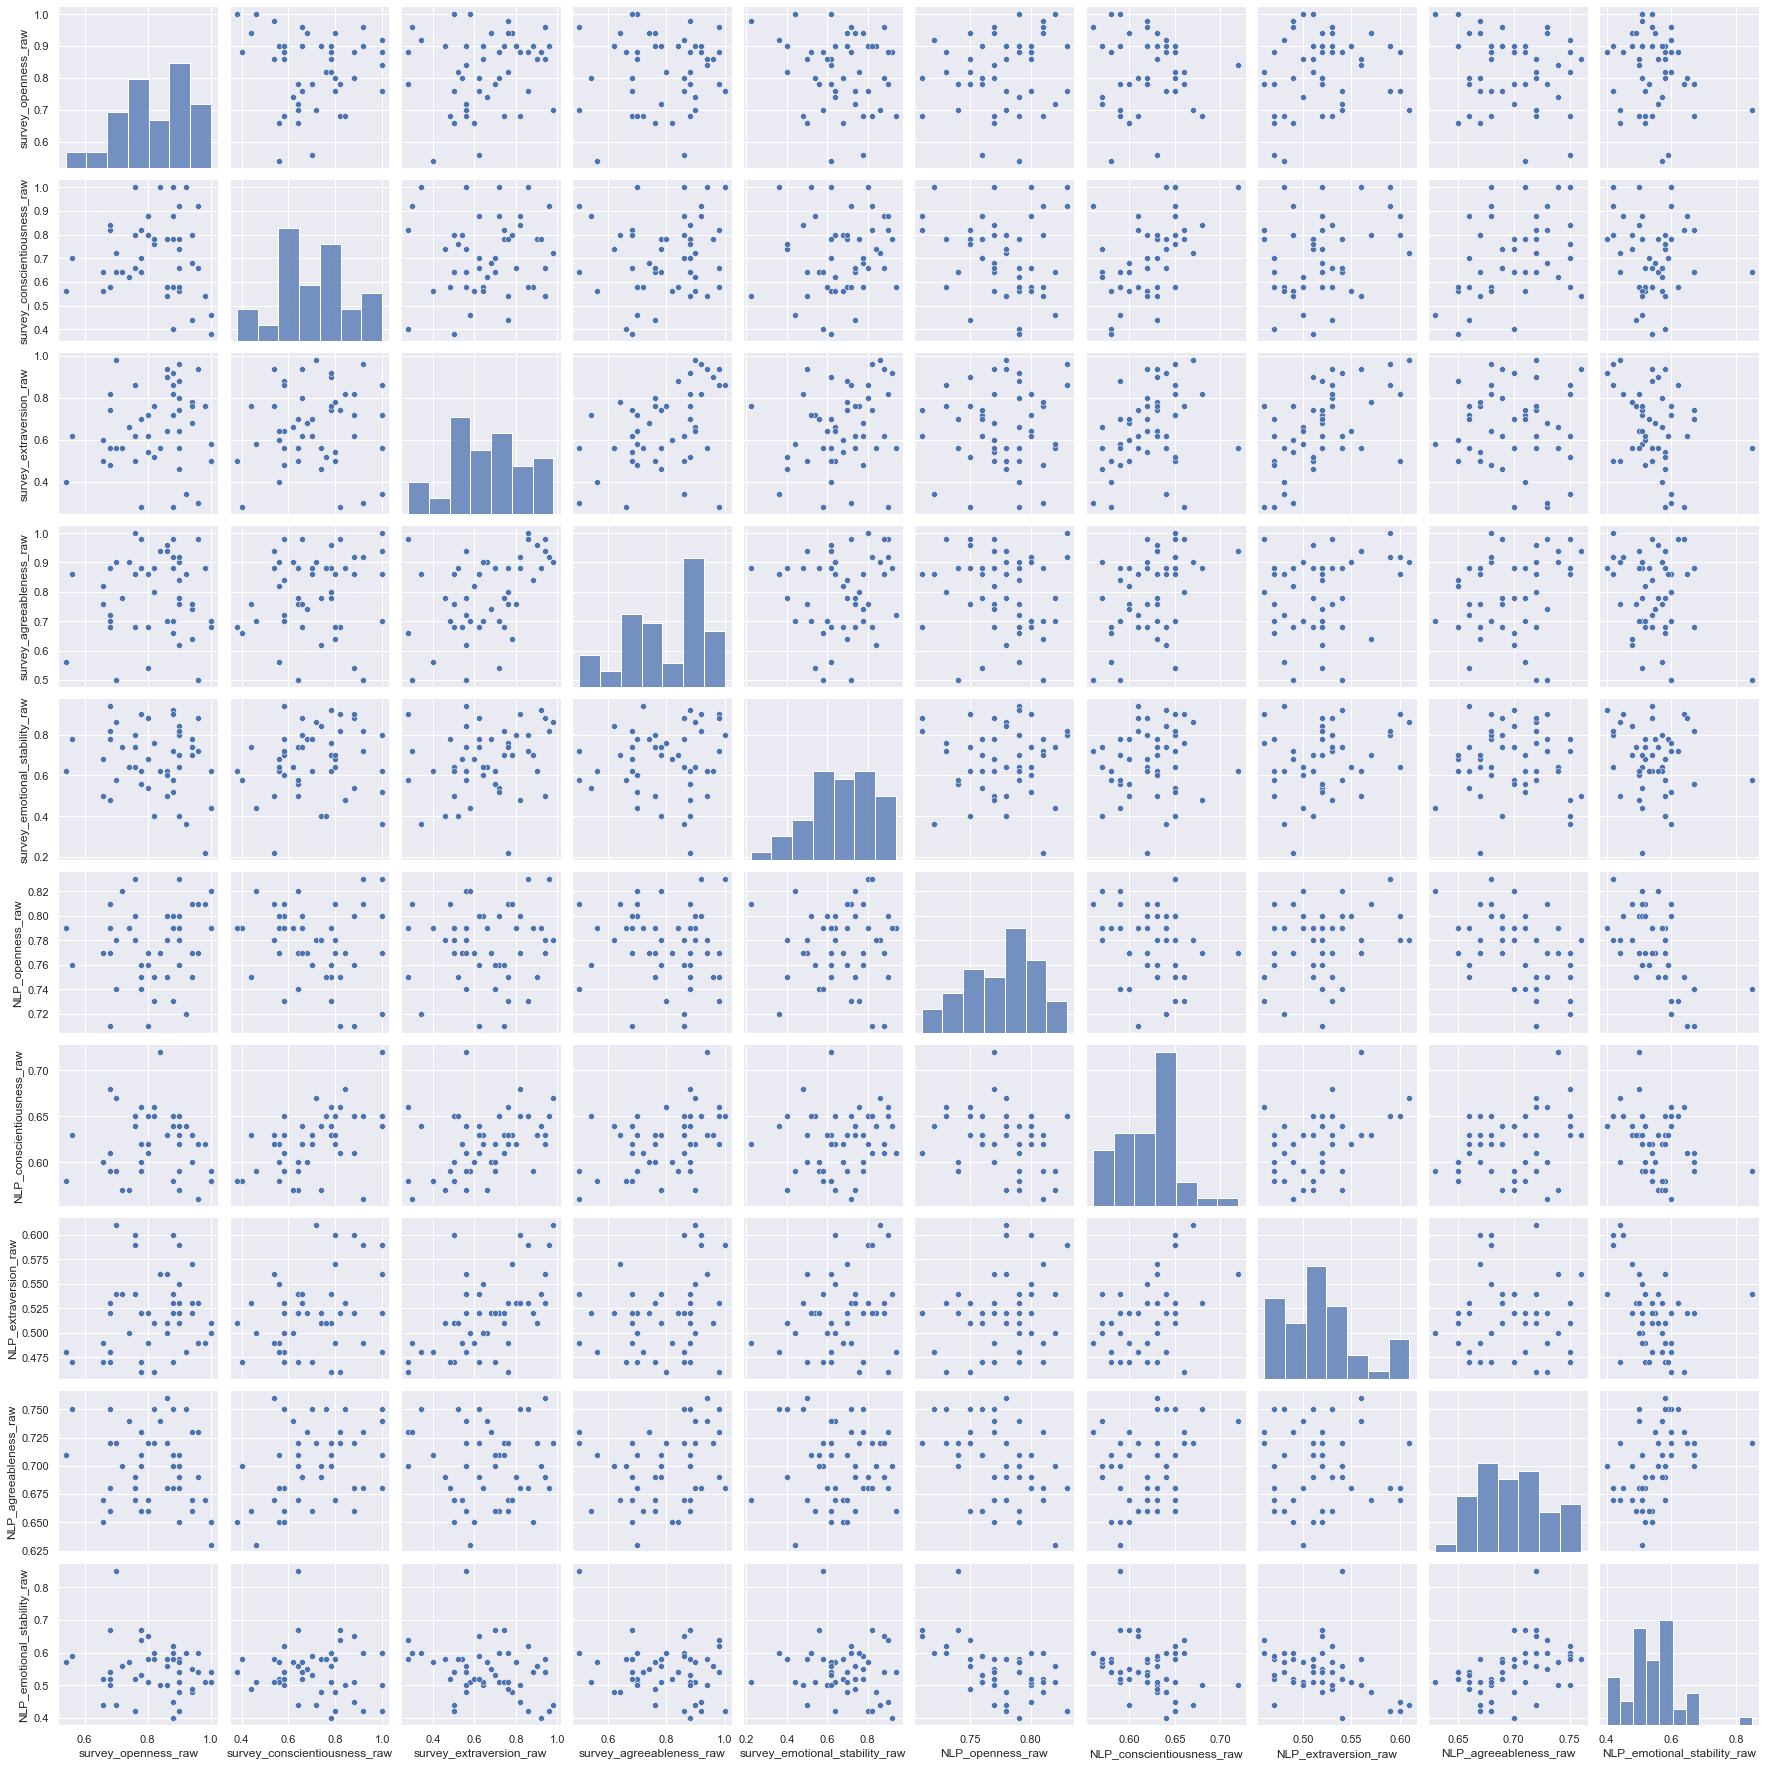

In [19]:
sns.pairplot(data)

In [20]:
# Correlation matrix

all_scores_3000_percentiles.corr()

,survey_openness_percentile,survey_conscientiousness_percentile,survey_extraversion_percentile,survey_agreeableness_percentile,survey_emotional_stability_percentile,NLP_openness_percentile,NLP_conscientiousness_percentile,NLP_extraversion_percentile,NLP_agreeableness_percentile,NLP_emotional_stability_percentile
survey_openness_percentile,1.000000,0.045935,0.217633,0.025774,-0.099250,0.148062,0.033214,0.086677,-0.135121,-0.091686
survey_conscientiousness_percentile,0.045935,1.000000,0.095686,0.168109,0.158883,-0.160658,0.550595,0.313132,0.229756,-0.067206
survey_extraversion_percentile,0.217633,0.095686,1.000000,0.444725,0.256444,-0.026499,0.390949,0.473936,-0.008649,-0.261680
survey_agreeableness_percentile,0.025774,0.168109,0.444725,1.000000,0.080213,-0.174285,0.416387,0.349986,0.350900,-0.098756
survey_emotional_stability_percentile,-0.099250,0.158883,0.256444,0.080213,1.000000,0.008554,0.132842,0.257814,-0.146705,-0.180056
NLP_openness_percentile,0.148062,-0.160658,-0.026499,-0.174285,0.008554,1.000000,-0.088619,0.230978,-0.382063,-0.606960
NLP_conscientiousness_percentile,0.033214,0.550595,0.390949,0.416387,0.132842,-0.088619,1.000000,0.461480,0.304376,-0.353008
NLP_extraversion_percentile,0.086677,0.313132,0.473936,0.349986,0.257814,0.230978,0.461480,1.000000,-0.076519,-0.502641
NLP_agreeableness_percentile,-0.135121,0.229756,-0.008649,0.350900,-0.146705,-0.382063,0.304376,-0.076519,1.000000,0.455018
NLP_emotional_stability_percentile,-0.091686,-0.067206,-0.261680,-0.098756,-0.180056,-0.606960,-0.353008,-0.502641,0.455018,1.000000


In [21]:
# create a correlation matrix heatmap
corr_matrix_3000_raw = all_scores_3000_raw.corr(method ='pearson')
corr_matrix_1000_raw = all_scores_1000_raw.corr(method = 'pearson')
corr_matrix_3000_percentile = all_scores_3000_percentiles.corr(method = 'spearman')
corr_matrix_1000_percentile = all_scores_1000_percentiles.corr(method = 'spearman')
# create a mask to remove the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix_3000_raw, dtype=bool))

for i in range(len(mask)): # make the diagonal 1s show in the final graph
    mask[i][i] = False

Text(0.0, 1.0, "CORRELATION MATRIX - 3000 w of content\nmethod: Spearman's rho")

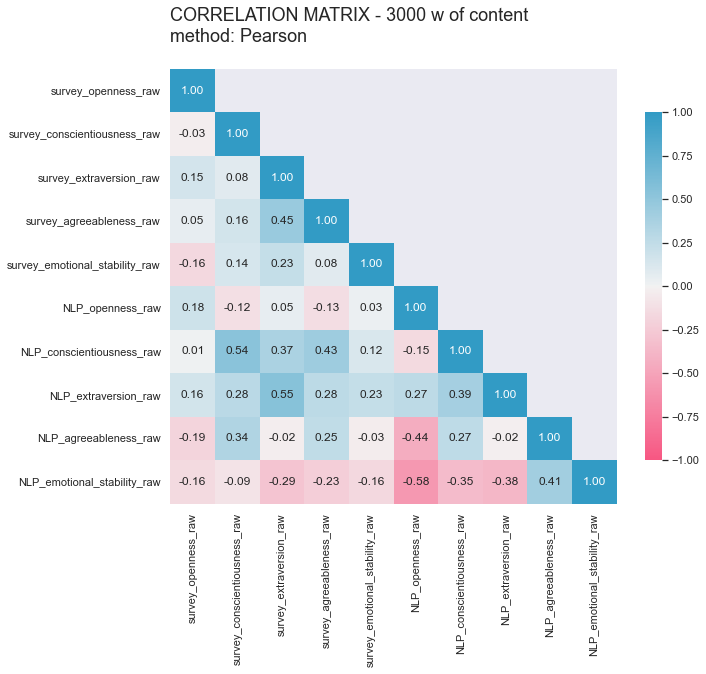

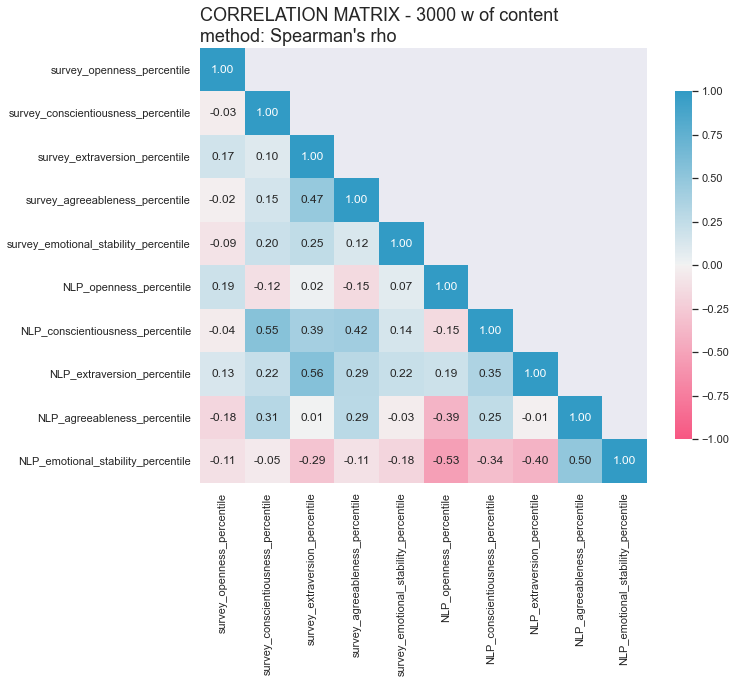

In [22]:
# plot a correlation matrix for 3000-word respondents
fig, ax = plt.subplots(figsize=(10, 8))
# plot heatmap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(corr_matrix_3000_raw, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

title = 'CORRELATION MATRIX - 3000 w of content\nmethod: Pearson\n'
plt.title(title, loc='left', fontsize=18)

# plot a correlation matrix for 3000-word percentiles with Spearman's Rho
fig, ax = plt.subplots(figsize=(10, 8))
# plot heatmap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(corr_matrix_3000_percentile, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

title = f"CORRELATION MATRIX - 3000 w of content\nmethod: Spearman's rho"
plt.title(title, loc='left', fontsize=18)


In [23]:
data = all_scores_1000_percentiles
print(f"n (all_scores_1000) = {len(all_scores_1000_percentiles)}")
print(f"n (all_scores_3000) = {len(all_scores_3000_percentiles)}")


n (all_scores_1000) = 100
n (all_scores_3000) = 49


## Correlation Plots

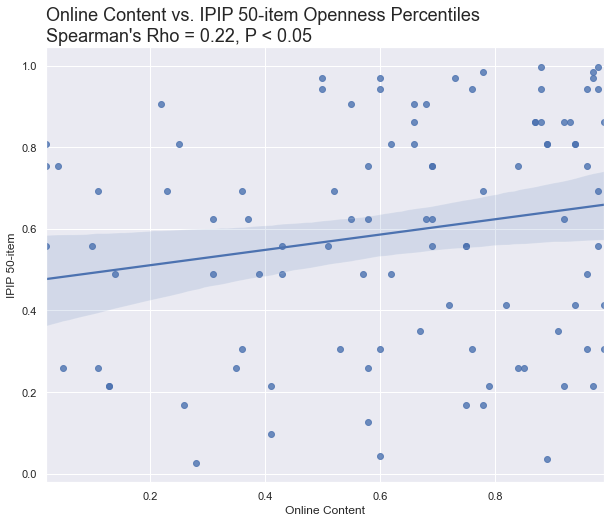

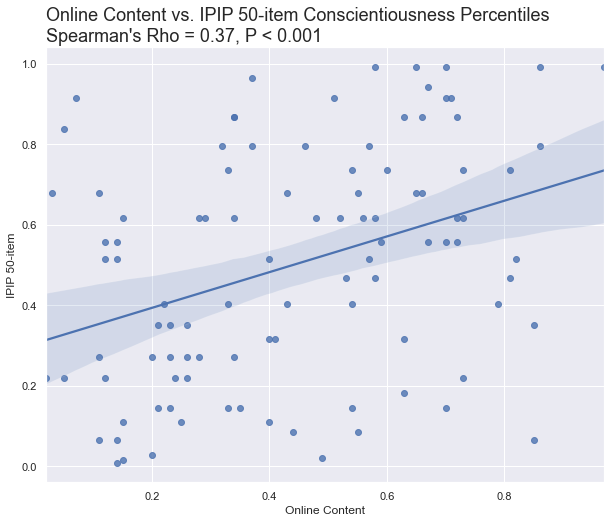

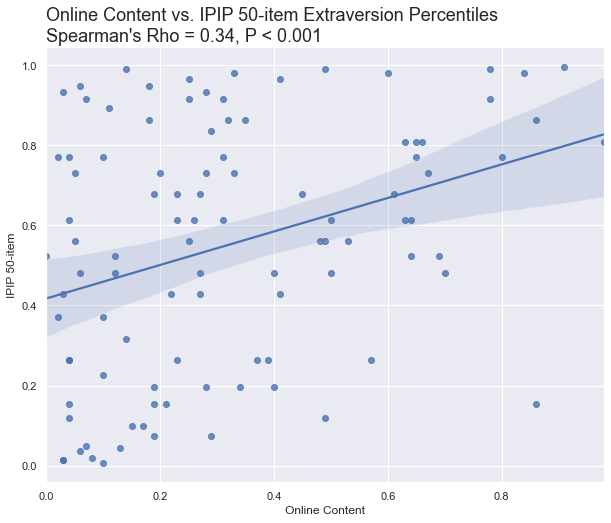

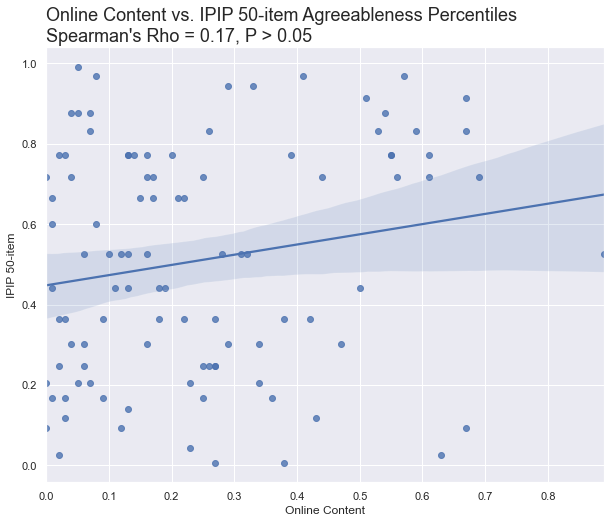

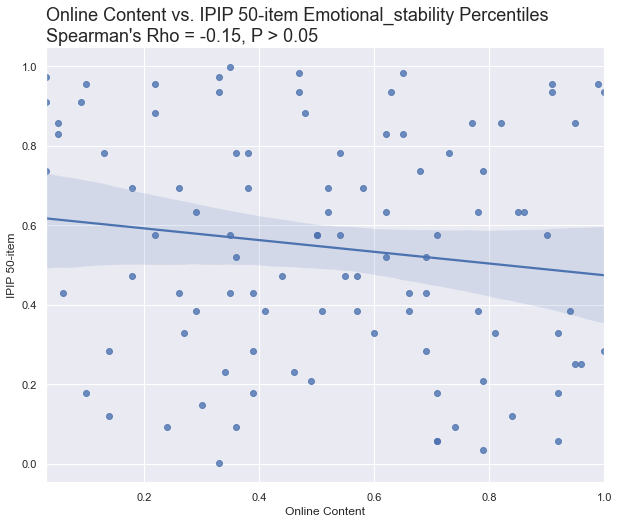

In [24]:
for i in big_5:
    plt.figure()
    sns.set_theme(style = 'ticks')

    rho, p = spearmanr(data[f"survey_{i}_percentile"], data[f"NLP_{i}_percentile"])
    if p < 0.001:
        p = 'P < 0.001'

    elif p < 0.01:
        p = 'P < 0.01'
    
    elif p < 0.05:
        p = 'P < 0.05'

    else:
        p = f"P > 0.05"


    sns.set(rc = {'figure.figsize':(10,8)})
    ax = sns.regplot(x = f"NLP_{i}_percentile", y = f"survey_{i}_percentile", data = data)
    ax.set(xlabel = f"Online Content", ylabel = f"IPIP 50-item")
    ax.set_title(label = f"Online Content vs. IPIP 50-item {i.capitalize()} Percentiles \nSpearman's Rho = {round(rho, 2)}, {p}", fontsize = 18, loc = 'left')





# 9 Linear Regression

## Data

In [25]:
# choose a dataset for analysis, add back the demographic variables
regression_data = pd.concat([all_scores_1000_raw, survey_data[['Age', 'Country', 'Gender']]], axis = 1, join = 'inner').copy()

# convert categorical data to dummy variables for regression
regression_data = pd.get_dummies(regression_data, columns = ['Age', 'Country', 'Gender'])

## Multiple regression (with demographic data as independent variables)

In [26]:
# regressions on each Big 5 trait with all demographic data
# this 'for loop' iterates through each big_5 trait and performs a regression on each, with demographic data
for i in big_5:
    X = regression_data[[f"NLP_{i}_raw", 'Age_18-24', 'Age_25-29', 'Age_30-34', 'Age_35-39', 'Age_40-44',
       'Age_45-49', 'Age_50-54', 'Age_55-59', 'Age_65+','Country_Argentina',
       'Country_Australia', 'Country_India', 'Country_Nigeria',
       'Country_Philippines', 'Country_Qatar', 'Country_Romania',
       'Country_Switzerland', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_United States','Gender_Female',
       'Gender_Male', 'Gender_Prefer not to say']]
    y = regression_data[f"survey_{i}_raw"]

    # X = sm.add_constant(X)

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    pred_ols = model.get_prediction()
    
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]

    
    # Print out the statistics
    print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     survey_openness_raw   R-squared:                       0.299
Model:                             OLS   Adj. R-squared:                  0.086
Method:                  Least Squares   F-statistic:                     1.407
Date:                 Fri, 25 Feb 2022   Prob (F-statistic):              0.136
Time:                         11:56:36   Log-Likelihood:                 101.76
No. Observations:                  100   AIC:                            -155.5
Df Residuals:                       76   BIC:                            -93.00
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NLP_op

## Simple regression (Survey Data ~ NLP Data)

In [27]:
# this for loop iterates through the Big 5 traits and performs a simple regression on each.
# the independent variable (X) is the set of NLP scores for each trait
for i in big_5:
    X = regression_data[f"NLP_{i}_raw"]
    y = regression_data[f"survey_{i}_raw"]

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    pred_ols = model.get_prediction()
    
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]

    
    # Print out the statistics
    print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     survey_openness_raw   R-squared (uncentered):                   0.984
Model:                             OLS   Adj. R-squared (uncentered):              0.984
Method:                  Least Squares   F-statistic:                              6061.
Date:                 Fri, 25 Feb 2022   Prob (F-statistic):                    1.28e-90
Time:                         11:56:36   Log-Likelihood:                          84.769
No. Observations:                  100   AIC:                                     -167.5
Df Residuals:                       99   BIC:                                     -164.9
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------